# Team SurabayaMining

## by: Grance Angelica, Jonathan Edwin, Stephen Jaya Gunawan

# Import library

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# import Data by using read_csv 

In [172]:
df = pd.read_csv('telco_data_with_bank_delq_clean.csv')
df1 = pd.read_csv('1. DEMO_BANK_INFO.csv', encoding = "ISO-8859-1")
df2 = pd.read_csv('2. BANK_TELCO_ID_MATCH.csv')
df3 = pd.read_csv('3. AGGREGATED_TELCO_TRANSACTIONS.csv')
df4 = pd.read_csv('4. MOBILE_OS.csv')
df5 = pd.read_csv('5. RAW_TELCO_TRANSACTIONS.csv')
df6 = pd.read_csv('VALIDATION_SET.csv', encoding = "ISO-8859-1", index_col= 'BANK_ID')
df5_pre = pd.read_csv('preProcessDF5.csv')
df7 = pd.read_csv('SUBMISSION.csv',index_col= 'BANK_ID')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13199 entries, 0 to 13198
Data columns (total 25 columns):
BANK_ID                  13199 non-null int64
AGE                      13199 non-null int64
MARITAL_STATUS           13199 non-null object
POSTAL_CD                13195 non-null float64
GENDER                   13199 non-null object
EDUCATION                10636 non-null object
STATE                    13199 non-null object
OCCUPATION               13199 non-null object
OCC_DESC                 13199 non-null object
CUST_SEGMENT             13199 non-null object
DEPENDENT_CNT            13199 non-null int64
CA_AVG_BAL               262 non-null float64
SA_AVG_BAL               11308 non-null float64
CA_CNT                   262 non-null float64
SA_CNT                   11308 non-null float64
CC_CNT                   13199 non-null int64
HP_CNT                   13199 non-null int64
TL_CNT                   13199 non-null int64
TLi_CNT                  13199 non-null int64
INS_

In [5]:
columns = ['AGE', 'MARITAL_STATUS', 'POSTAL_CD','GENDER','EDUCATION','STATE', 'OCCUPATION', 'OCC_DESC', 'CUST_SEGMENT','DEPENDENT_CNT', 'CA_AVG_BAL', 'CA_CNT', 'loan_application_date']

In [6]:
df1_drop = df1.drop(columns, axis =1)
df6_drop = df6.drop(columns, axis =1)

In [7]:
df1_drop.head()

,BANK_ID,SA_AVG_BAL,SA_CNT,CC_CNT,HP_CNT,TL_CNT,TLi_CNT,INS_CREDIT_LIFE_CNT,INS_LIFE_CNT,INS_NON_LIFE_CNT,INS_CNT,DELQ_FLG
0,13398,817.676333,1.0,2,0,0,0,0,0,0,0,N
1,16152,1599.595667,1.0,0,0,0,0,0,0,0,0,N
2,18560,NaN,NaN,0,0,0,0,0,0,0,0,N
3,18568,NaN,NaN,0,0,0,0,0,0,0,0,N
4,26717,NaN,NaN,0,0,0,0,0,0,0,0,N


In [8]:
df6_drop.head()

,BANK_ID,SA_AVG_BAL,SA_CNT,CC_CNT,HP_CNT,TL_CNT,TLi_CNT,INS_CREDIT_LIFE_CNT,INS_LIFE_CNT,INS_NON_LIFE_CNT,INS_CNT
0,10001,10558.654670,1.0,1,0,0,0,0,0,0,0
1,10006,126.347419,1.0,0,0,0,0,0,0,0,0
2,10018,241.085333,1.0,0,1,0,0,0,0,0,0
3,10019,392.004333,1.0,0,0,0,0,0,0,0,0
4,10028,131482.887400,1.0,1,1,0,0,0,0,0,0


In [9]:
df6_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657 entries, 0 to 5656
Data columns (total 11 columns):
BANK_ID                5657 non-null int64
SA_AVG_BAL             4871 non-null float64
SA_CNT                 4871 non-null float64
CC_CNT                 5657 non-null int64
HP_CNT                 5657 non-null int64
TL_CNT                 5657 non-null int64
TLi_CNT                5657 non-null int64
INS_CREDIT_LIFE_CNT    5657 non-null int64
INS_LIFE_CNT           5657 non-null int64
INS_NON_LIFE_CNT       5657 non-null int64
INS_CNT                5657 non-null int64
dtypes: float64(2), int64(9)
memory usage: 486.2 KB


# Assumptions that Missing value in SA is they dont make their saving account so we can make it to zero

In [10]:
df1_drop[['SA_AVG_BAL','SA_CNT']] = df1_drop[['SA_AVG_BAL','SA_CNT']].fillna(value=0)
df6_drop[['SA_AVG_BAL','SA_CNT']] = df6_drop[['SA_AVG_BAL','SA_CNT']].fillna(value=0)

In [11]:
df5_pre.head()

,TELCO_ID,NUM_WEB,NUM_APP,NUM_POSTPAID,NUM_PREPAID
0,C-42552,29,0,12,17
1,C-43558,23,30,5,48
2,C-44626,1,6,7,0
3,C-42481,8,0,8,0
4,C-44902,12,0,12,0


In [12]:
df3.head()

,TELCO_ID,PREPAID_AMT_MTH_1,PREPAID_AMT_MTH_2,PREPAID_AMT_MTH_3,PREPAID_AMT_MTH_4,PREPAID_AMT_MTH_5,PREPAID_AMT_MTH_6,PREPAID_CNT_MTH_1,PREPAID_CNT_MTH_2,PREPAID_CNT_MTH_3,...,POSTPAID_CNT_MTH_5,POSTPAID_CNT_MTH_6,TOTAL_POSTPAID_AMT,TOTAL_POSTPAID_CNT,TOTAL_PREPAID_AMT,TOTAL_PREPAID_CNT,AVG_POSTPAID_AMT,AVG_POSTPAID_CNT,AVG_PREPAID_AMT,AVG_PREPAID_CNT
0,C-42552,100.0,87.50,187.50,62.50,175.00,137.50,2.5,2.50,6.25,...,3.75,3.75,1987.2500,15.00,750.00,21.25,331.208333,2.500000,125.000000,3.541667
1,C-43558,300.0,231.25,56.25,106.25,68.75,106.25,17.5,18.75,7.50,...,1.25,1.25,827.5000,6.25,868.75,60.00,137.916667,1.041667,144.791667,10.000000
2,C-44626,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,1.25,1.25,1356.8125,8.75,0.00,0.00,226.135417,1.458333,0.000000,0.000000
3,C-42481,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,2391.2500,10.00,0.00,0.00,398.541667,1.666667,0.000000,0.000000
4,C-44902,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,2.50,910.5000,15.00,0.00,0.00,151.750000,2.500000,0.000000,0.000000


# We used only Average or prepaid+postpaid data and make it into new features for amount(AMT) AND count(CNT)

In [13]:
df3['AVG_PAID_AMT'] = ((df3['AVG_POSTPAID_AMT']*6) + (df3['AVG_PREPAID_AMT']*6))/6

In [14]:
df3['AVG_PAID_CNT'] = ((df3['AVG_POSTPAID_CNT']*6) + (df3['AVG_PREPAID_CNT']*6))//6

In [15]:
df2.head()

,BANK_ID,TELCO_ID
0,12140,C-42552
1,17875,C-50147
2,12935,C-43558
3,18777,C-51391
4,17083,C-49078


In [16]:
df2_df3= pd.merge(df2, df3, how = 'left', left_on=['TELCO_ID'], right_on=['TELCO_ID'])

In [17]:
df2_df3.head()

,BANK_ID,TELCO_ID,PREPAID_AMT_MTH_1,PREPAID_AMT_MTH_2,PREPAID_AMT_MTH_3,PREPAID_AMT_MTH_4,PREPAID_AMT_MTH_5,PREPAID_AMT_MTH_6,PREPAID_CNT_MTH_1,PREPAID_CNT_MTH_2,...,TOTAL_POSTPAID_AMT,TOTAL_POSTPAID_CNT,TOTAL_PREPAID_AMT,TOTAL_PREPAID_CNT,AVG_POSTPAID_AMT,AVG_POSTPAID_CNT,AVG_PREPAID_AMT,AVG_PREPAID_CNT,AVG_PAID_AMT,AVG_PAID_CNT
0,12140,C-42552,100.0,87.50,187.50,62.50,175.00,137.50,2.5,2.50,...,1987.25,15.00,750.00,21.25,331.208333,2.500000,125.000000,3.541667,456.208333,6.0
1,17875,C-50147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12935,C-43558,300.0,231.25,56.25,106.25,68.75,106.25,17.5,18.75,...,827.50,6.25,868.75,60.00,137.916667,1.041667,144.791667,10.000000,282.708333,11.0
3,18777,C-51391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17083,C-49078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df2_df3_choosen = df2_df3[['BANK_ID','AVG_PAID_AMT', 'AVG_PAID_CNT']]

In [19]:
df2_df3_choosen_groupby = df2_df3_choosen.groupby(['BANK_ID']).sum()

In [20]:
df2_df3_choosen_groupby.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16080 entries, 10001 to 29332
Data columns (total 2 columns):
AVG_PAID_AMT    16080 non-null float64
AVG_PAID_CNT    16080 non-null float64
dtypes: float64(2)
memory usage: 376.9 KB


In [21]:
df2_df3_choosen_groupby.head()

,AVG_PAID_AMT,AVG_PAID_CNT
BANK_ID,,
10001,0.000000,0.0
10002,0.000000,0.0
10004,0.000000,0.0
10009,0.000000,0.0
10010,351.979167,2.0


In [22]:
df2_df3_choosen_groupby_resetIndex = df2_df3_choosen_groupby.reset_index()

In [23]:
df2_df3_choosen_groupby_resetIndex.head()

,BANK_ID,AVG_PAID_AMT,AVG_PAID_CNT
0,10001,0.000000,0.0
1,10002,0.000000,0.0
2,10004,0.000000,0.0
3,10009,0.000000,0.0
4,10010,351.979167,2.0


# Merge Dataframe df1 or df6 with df2_df3

In [24]:
df1_df23= pd.merge(df1_drop, df2_df3_choosen_groupby_resetIndex, how = 'left', left_on=['BANK_ID'], right_on=['BANK_ID'])

In [25]:
df6_df23= pd.merge(df6_drop, df2_df3_choosen_groupby_resetIndex, how = 'left', left_on=['BANK_ID'], right_on=['BANK_ID'])

In [26]:
df1_df23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13199 entries, 0 to 13198
Data columns (total 14 columns):
BANK_ID                13199 non-null int64
SA_AVG_BAL             13199 non-null float64
SA_CNT                 13199 non-null float64
CC_CNT                 13199 non-null int64
HP_CNT                 13199 non-null int64
TL_CNT                 13199 non-null int64
TLi_CNT                13199 non-null int64
INS_CREDIT_LIFE_CNT    13199 non-null int64
INS_LIFE_CNT           13199 non-null int64
INS_NON_LIFE_CNT       13199 non-null int64
INS_CNT                13199 non-null int64
DELQ_FLG               13199 non-null object
AVG_PAID_AMT           11144 non-null float64
AVG_PAID_CNT           11144 non-null float64
dtypes: float64(4), int64(9), object(1)
memory usage: 1.5+ MB


In [27]:
df6_df23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5657 entries, 0 to 5656
Data columns (total 13 columns):
BANK_ID                5657 non-null int64
SA_AVG_BAL             5657 non-null float64
SA_CNT                 5657 non-null float64
CC_CNT                 5657 non-null int64
HP_CNT                 5657 non-null int64
TL_CNT                 5657 non-null int64
TLi_CNT                5657 non-null int64
INS_CREDIT_LIFE_CNT    5657 non-null int64
INS_LIFE_CNT           5657 non-null int64
INS_NON_LIFE_CNT       5657 non-null int64
INS_CNT                5657 non-null int64
AVG_PAID_AMT           4782 non-null float64
AVG_PAID_CNT           4782 non-null float64
dtypes: float64(4), int64(9)
memory usage: 618.7 KB


# Fill Missing Value with 0, because it means that BANK_ID doesn't have any TELCO_ID

In [28]:
df1_df23[['AVG_PAID_AMT','AVG_PAID_CNT']] = df1_df23[['AVG_PAID_AMT','AVG_PAID_CNT']].fillna(value=0)
df6_df23[['AVG_PAID_AMT','AVG_PAID_CNT']] = df6_df23[['AVG_PAID_AMT','AVG_PAID_CNT']].fillna(value=0)

In [29]:
df1_df23.set_index('BANK_ID', inplace= True)

In [30]:
df6_df23.set_index('BANK_ID', inplace= True)

# Using LabelEncoder to change categorical data into numerical data

In [31]:
le = LabelEncoder()
arr_delq= df1_df23.DELQ_FLG.unique()
le.fit(arr_delq)
df1_df23['DELQ_FLG'] = le.transform(df1_df23['DELQ_FLG'])

In [32]:
df1_df23['DELQ_FLG'].value_counts()

0    12268
1      931
Name: DELQ_FLG, dtype: int64

In [33]:
931/12268 * 100

7.5888490381480285

In [34]:
df1_df23.head()

,SA_AVG_BAL,SA_CNT,CC_CNT,HP_CNT,TL_CNT,TLi_CNT,INS_CREDIT_LIFE_CNT,INS_LIFE_CNT,INS_NON_LIFE_CNT,INS_CNT,DELQ_FLG,AVG_PAID_AMT,AVG_PAID_CNT
BANK_ID,,,,,,,,,,,,,
13398,817.676333,1.0,2,0,0,0,0,0,0,0,0,72.916667,1.0
16152,1599.595667,1.0,0,0,0,0,0,0,0,0,0,0.000000,0.0
18560,0.000000,0.0,0,0,0,0,0,0,0,0,0,0.000000,0.0
18568,0.000000,0.0,0,0,0,0,0,0,0,0,0,0.000000,0.0
26717,0.000000,0.0,0,0,0,0,0,0,0,0,0,0.000000,0.0


In [35]:
df1_df23.to_csv('train.csv')
df6_df23.to_csv('test.csv')

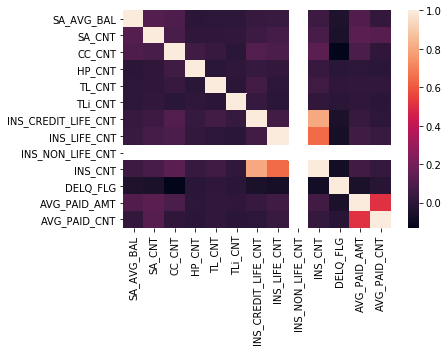

In [185]:
sns.heatmap(df1_df23.corr())

# ------------------------------------------------------------------------------
# Check Feature Importance

In [36]:
X = df1_df23.drop('DELQ_FLG', axis =1)

In [37]:
y = df1_df23['DELQ_FLG']

In [38]:
y.head()

BANK_ID
13398    0
16152    0
18560    0
18568    0
26717    0
Name: DELQ_FLG, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

In [40]:
scaler = MinMaxScaler()
X[['SA_AVG_BAL', 'SA_CNT']] = scaler.fit_transform(X[['SA_AVG_BAL', 'SA_CNT']])


In [41]:
rf = RandomForestClassifier(random_state= 42, class_weight= 'balanced')

In [42]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

Text(0.5,1,'Feature importances')

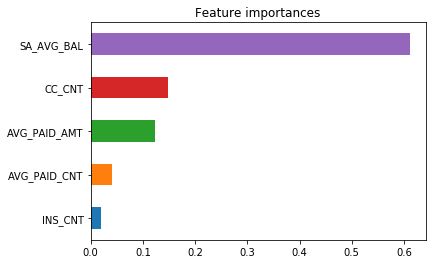

In [43]:
(pd.Series(rf.feature_importances_, index=X.columns).nlargest(5).sort_values(ascending= True)
   .plot(kind='barh'))
plt.title('Feature importances')

# ------------------------------------------------------------------------------
# Create Pipeline

In [44]:
pl_svc = Pipeline([
    ('scale', MinMaxScaler(feature_range=(0, 1))),
    ('svc', SVC(class_weight= 'balanced'))
])

In [45]:
pl_lr = Pipeline([
    ('scale', MinMaxScaler(feature_range=(0, 1))),
    ('lr', LogisticRegression(class_weight='balanced'))
])

In [46]:
pl_knn = Pipeline([
    ('scale', MinMaxScaler(feature_range=(0, 1))),
    ('knn', KNeighborsClassifier(n_neighbors = 3))
])

In [47]:
pl_rf = Pipeline([
    ('scale', MinMaxScaler(feature_range=(0, 1))),
    ('rf', RandomForestClassifier(random_state=42))
])

# try to use  model directly to the data

In [48]:
pl_svc.fit(X_train, y_train)
y_pred = pl_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
classification_report(y_test,y_pred)

[[1030 1424]
 [  22  164]]


'             precision    recall  f1-score   support\n\n          0       0.98      0.42      0.59      2454\n          1       0.10      0.88      0.18       186\n\navg / total       0.92      0.45      0.56      2640\n'

In [49]:
pl_lr.fit(X_train, y_train)
y_pred = pl_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
classification_report(y_test,y_pred)

[[1212 1242]
 [  31  155]]


'             precision    recall  f1-score   support\n\n          0       0.98      0.49      0.66      2454\n          1       0.11      0.83      0.20       186\n\navg / total       0.91      0.52      0.62      2640\n'

In [50]:
pl_knn.fit(X_train, y_train)
y_pred = pl_knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
classification_report(y_test,y_pred)

[[2414   40]
 [ 183    3]]


'             precision    recall  f1-score   support\n\n          0       0.93      0.98      0.96      2454\n          1       0.07      0.02      0.03       186\n\navg / total       0.87      0.92      0.89      2640\n'

In [51]:
pl_rf.fit(X_train, y_train)
y_pred = pl_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(
    classification_report(y_test,y_pred))

[[2398   56]
 [ 178    8]]


'             precision    recall  f1-score   support\n\n          0       0.93      0.98      0.95      2454\n          1       0.12      0.04      0.06       186\n\navg / total       0.87      0.91      0.89      2640\n'

# ------------------------------------------------------------------------------

# try to oversampling using SMOTE to the data and try to predict

In [65]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_sample(X, y)

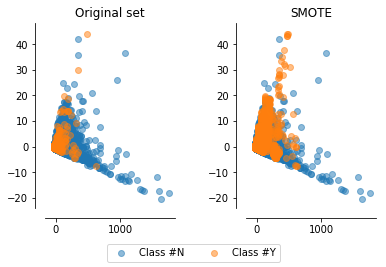

In [66]:
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply SMOTE 
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class N", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class Y", alpha=0.5)
ax2.set_title('SMOTE')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    #ax.set_xlim([0, 30])
    #ax.set_ylim([-1, 10])

f.legend((c0, c1), ('Class #N', 'Class #Y'), loc='lower center',
         ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

In [203]:
pl_rf.fit(X_resampled, y_resampled)
y_pred = pl_rf.predict(X_test)
y_prob = pl_rf.predict_proba(X_test)[:,1]
#(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("AUC: {}".format(roc_auc_score(y_test, y_prob)))

             precision    recall  f1-score   support

          0       0.95      0.67      0.78      2454
          1       0.12      0.58      0.19       186

avg / total       0.90      0.66      0.74      2640

AUC: 0.6828647106764467


In [55]:
pl_knn.fit(X_resampled, y_resampled)
y_pred = pl_knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
classification_report(y_test,y_pred)

[[2454    0]
 [ 185    1]]


'             precision    recall  f1-score   support\n\n          0       0.93      1.00      0.96      2454\n          1       1.00      0.01      0.01       186\n\navg / total       0.93      0.93      0.90      2640\n'

In [202]:
ac = AdaBoostClassifier(random_state= 42)

ac.fit(X_resampled, y_resampled)
y_pred = ac.predict(X_test)
y_prob = ac.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test,y_pred))
print("AUC: {}".format(roc_auc_score(y_test, y_prob)))

[[2189  265]
 [ 146   40]]
             precision    recall  f1-score   support

          0       0.94      0.89      0.91      2454
          1       0.13      0.22      0.16       186

avg / total       0.88      0.84      0.86      2640

AUC: 0.6910957313493004


Classification of original dataset with Bagging (scikit-learn)


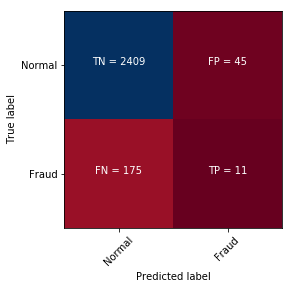

Recall=0.059 
Precision=0.196
F1=0.091
Average precision-recall score: 0.098


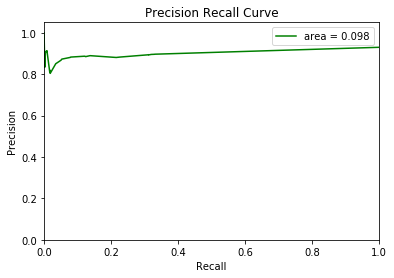

Classification of original dataset with BalancedBagging (imbalanced-learn)


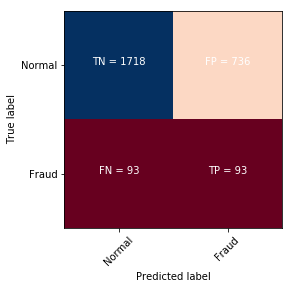

Recall=0.500 
Precision=0.112
F1=0.183
Average precision-recall score: 0.102


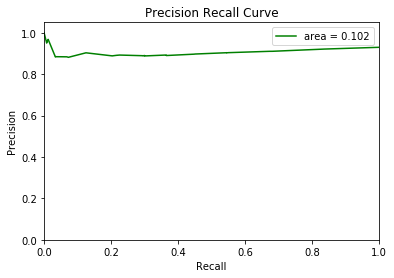

In [73]:
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

from imblearn.metrics import classification_report_imbalanced

bagging = BaggingClassifier(random_state=0)
balanced_bagging = BalancedBaggingClassifier(random_state=0)

bagging.fit(X_train, y_train)
balanced_bagging.fit(X_train, y_train)

#Make predictions
print('Classification of original dataset with Bagging (scikit-learn)')
y_pred = bagging.predict(X_test)
try:
    scores = bagging.decision_function(X_test)
except:
    scores = bagging.predict_proba(X_test)[:,1]

#Make plots
plot_cm(bagging, y_pred)
plot_aucprc(bagging, scores)

#Make predictions
print('Classification of original dataset with BalancedBagging (imbalanced-learn)')
y_pred = balanced_bagging.predict(X_test)
try:
    scores = balanced_bagging.decision_function(X_test)
except:
    scores = balanced_bagging.predict_proba(X_test)[:,1]

#Make plots
plot_cm(balanced_bagging, y_pred)
plot_aucprc(balanced_bagging, scores)

In [95]:
y_resample.shape

(10559,)

In [204]:
clf1.fit(X_resampled, y_resampled)
y_pred = clf1.predict(X_test)
y_prob = clf1.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("AUC: {}".format(roc_auc_score(y_test, y_prob)))

[[2204  250]
 [ 152   34]]
             precision    recall  f1-score   support

          0       0.94      0.90      0.92      2454
          1       0.12      0.18      0.14       186

avg / total       0.88      0.85      0.86      2640

AUC: 0.660364688767954


In [112]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=42, )
clf2 = RandomForestClassifier(n_estimators=42, random_state=42, class_weight= 'balanced', max_depth= 3, max_features=5)
clf3 = GaussianNB()

In [113]:
eclf1 = VotingClassifier(estimators=[
('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[1513  941]
 [  56  130]]
             precision    recall  f1-score   support

          0       0.96      0.62      0.75      2454
          1       0.12      0.70      0.21       186

avg / total       0.90      0.62      0.71      2640



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [111]:
eclf2 = VotingClassifier(estimators=[
('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[1853  601]
 [  84  102]]
             precision    recall  f1-score   support

          0       0.96      0.76      0.84      2454
          1       0.15      0.55      0.23       186

avg / total       0.90      0.74      0.80      2640



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [87]:
eclf3 = VotingClassifier(estimators=[
('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[5,20,5],flatten_transform=True)
eclf3 = eclf3.fit(X_train, y_train)
y_pred = eclf3.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[2132  322]
 [ 142   44]]
             precision    recall  f1-score   support

          0       0.94      0.87      0.90      2454
          1       0.12      0.24      0.16       186

avg / total       0.88      0.82      0.85      2640



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [91]:
eclf3 = VotingClassifier(estimators=[
('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1,3,2],flatten_transform=True)
eclf3 = eclf3.fit(X_resampled, y_resampled)
y_pred = eclf3.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[2174  280]
 [ 147   39]]
             precision    recall  f1-score   support

          0       0.94      0.89      0.91      2454
          1       0.12      0.21      0.15       186

avg / total       0.88      0.84      0.86      2640



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# ----------------------------------------------------------------
# Try to ensemble stacking model with Extratrees and Random Forest for first stack and  VotingClassifier for second stack

In [200]:
rf = RandomForestClassifier(criterion='entropy',random_state=42, n_estimators=42,  class_weight= 'balanced', max_depth= 3, max_leaf_nodes= 2000, max_features=7)

In [201]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("AUC: {}".format(roc_auc_score(y_test, y_prob)))

[[1411 1043]
 [  42  144]]
             precision    recall  f1-score   support

          0       0.97      0.57      0.72      2454
          1       0.12      0.77      0.21       186

avg / total       0.91      0.59      0.69      2640

AUC: 0.7188494097852092


In [149]:
param_grid = {'n_estimators': [42], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes':[2000], 'max_depth':[2,3,5],'min_samples_leaf':[5,10,20], 'max_features':[3,5,7], 'random_state':[42]}

In [152]:
rf_cv = GridSearchCV(rf, param_grid,cv = 5, scoring= 'roc_auc')

In [153]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=2, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=42, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [42], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [2000], 'max_depth': [2, 3, 5], 'min_samples_leaf': [5, 10, 20], 'max_features': [3, 5, 7], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [154]:
print("Tuned Random Forest Parameter: {}".format(rf_cv.best_params_))
print("Tuned Random Forest Accuracy: {}".format(rf_cv.best_score_))

Tuned Random Forest Parameter: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'max_leaf_nodes': 2000, 'min_samples_leaf': 10, 'n_estimators': 42, 'random_state': 42}
Tuned Random Forest Accuracy: 0.7205949507015068


In [157]:
param_grid = {'n_estimators': [42], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes':[2000], 'max_depth':[2,3,5],'min_samples_leaf':[5,10,20], 'max_features':[3,5,7], 'random_state':[42]}

In [158]:
ec_cv = GridSearchCV(ec, param_grid,cv = 5, scoring= 'roc_auc')

In [159]:
ec_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=5, max_features=4,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=42, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [42], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [2000], 'max_depth': [2, 3, 5], 'min_samples_leaf': [5, 10, 20], 'max_features': [3, 5, 7], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [160]:
print("Tuned Random Forest Parameter: {}".format(ec_cv.best_params_))
print("Tuned Random Forest Accuracy: {}".format(ec_cv.best_score_))

Tuned Random Forest Parameter: {'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'max_leaf_nodes': 2000, 'min_samples_leaf': 5, 'n_estimators': 42, 'random_state': 42}
Tuned Random Forest Accuracy: 0.7057286690595975


In [162]:
ec = ExtraTreesClassifier(random_state= 42, n_estimators= 42, class_weight= 'balanced', max_depth= 5, max_features=3, criterion='gini',min_samples_leaf=5)

In [163]:
ec.fit(X_train, y_train)
y_pred = ec.predict(X_test)
y_prob = ec.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("AUC: {}".format(roc_auc_score(y_test, y_prob)))

[[1274 1180]
 [  38  148]]
             precision    recall  f1-score   support

          0       0.97      0.52      0.68      2454
          1       0.11      0.80      0.20       186

avg / total       0.91      0.54      0.64      2640

AUC: 0.7042945027210348


In [191]:
clf1 = LogisticRegression(solver='lbfgs',random_state=42, class_weight= 'balanced')

In [199]:
eclf = VotingClassifier(estimators=[
 ('rf', rf), ('ec', ec)], voting='soft', weights=[3,1],flatten_transform=True)
eclf = eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
y_prob = eclf.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("AUC: {}".format(roc_auc_score(y_test, y_prob)))

[[1286 1168]
 [  33  153]]
             precision    recall  f1-score   support

          0       0.97      0.52      0.68      2454
          1       0.12      0.82      0.20       186

avg / total       0.91      0.55      0.65      2640

AUC: 0.7176510152395474


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# ---------------------------------------------------------------------
# Predict the validation data and export it to csv

In [171]:
df6.head()

,AGE,MARITAL_STATUS,POSTAL_CD,GENDER,EDUCATION,STATE,OCCUPATION,OCC_DESC,CUST_SEGMENT,DEPENDENT_CNT,...,SA_CNT,CC_CNT,HP_CNT,TL_CNT,TLi_CNT,INS_CREDIT_LIFE_CNT,INS_LIFE_CNT,INS_NON_LIFE_CNT,INS_CNT,loan_application_date
BANK_ID,,,,,,,,,,,,,,,,,,,,,
10001,59,Married,47500.0,Male,Bachelor,Selangor Darul Ehsan,"Professionals, Passenger/Cargo Aircraft - Air ...",OTHERS,PREFERRED,0.0,...,1.0,1,0,0,0,0,0,0,0,04Jul2017
10006,58,Married,75200.0,Male,Secondary,Melaka,"Plant/Machine, Drivers/Mobile Plant Operators...",NON-EXECUTIVE,MASS,0.0,...,1.0,0,0,0,0,0,0,0,0,01Nov2017
10018,58,Married,40400.0,Male,Secondary,Selangor Darul Ehsan,"Plant/Machine, Drivers/Mobile Plant Operators...",NON-EXECUTIVE,MASS,1.0,...,1.0,0,1,0,0,0,0,0,0,05Jul2017
10019,58,Married,81700.0,Male,No Formal Education / Unknown,Johor Darul Takzim,"Associate Professionals, Artistic and Cultural...",OTHERS,MASS,0.0,...,1.0,0,0,0,0,0,0,0,0,29Dec2017
10028,57,Married,48050.0,Male,NaN,Selangor Darul Ehsan,"Managers, Administrative/Commercial Managers/A...",MANAGER OR SUPERVISOR,PREFERRED,0.0,...,1.0,1,1,0,0,0,0,0,0,10Aug2017


In [173]:
df7.head()

,PROBABILITY,DELQ_FLG,Unnamed: 3,Unnamed: 4
BANK_ID,,,,
10001,NaN,NaN,NaN,NaN
10006,NaN,NaN,NaN,NaN
10018,NaN,NaN,NaN,NaN
10019,NaN,NaN,NaN,NaN
10028,NaN,NaN,NaN,


In [175]:
eclf = VotingClassifier(estimators=[
 ('rf', rf), ('ec', ec)], voting='soft', weights=[3,1],flatten_transform=True)
eclf = eclf.fit(X, y)

df7['DELQ_FLG'] = eclf.predict(df6_df23)
df7['PROBABILITY'] = eclf.predict_proba(df6_df23)[:,1]

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [176]:
df7.head()

,PROBABILITY,DELQ_FLG,Unnamed: 3,Unnamed: 4
BANK_ID,,,,
10001,0.184419,0,NaN,NaN
10006,0.477725,0,NaN,NaN
10018,0.478554,0,NaN,NaN
10019,0.477725,0,NaN,NaN
10028,0.190378,0,NaN,


In [179]:
df7.drop(df7.columns[3], axis=1,inplace= True)

In [180]:
df7.head()

,PROBABILITY,DELQ_FLG,Unnamed: 3
BANK_ID,,,
10001,0.184419,0,NaN
10006,0.477725,0,NaN
10018,0.478554,0,NaN
10019,0.477725,0,NaN
10028,0.190378,0,NaN


In [181]:
df7.drop(df7.columns[2], axis=1,inplace= True)

In [183]:
df7.to_csv('Submission_SurabayMining.csv')